In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#import dataset and labels
X = pd.read_csv("weather_prediction_dataset.csv")
y = pd.read_csv("weather_prediction_bbq_labels.csv")
first4_country_label_list_name = ["BASEL_BBQ_weather", "BUDAPEST_BBQ_weather", "DE_BBQ_weather", "DRESDEN_BBQ_weather"]


In [5]:
X_first4 = X.iloc[:, 0:40]
humid_inds = [3, 12, 22, 33]
precip_inds = [6, 15, 25, 35]

#humidity and precip for first 4 countries
X_first4_humid = X_first4.iloc[:, humid_inds]
X_first_4_precip = X_first4.iloc[:, precip_inds]

#subset above dataframes into where y is true/false
y_first4 = y.iloc[:, :5]

inds_true_list = []
inds_false_list = []
for column_name in first4_country_label_list_name:
    list_to_parse = list(y_first4.loc[:, column_name])
    inds_true = [i for i, value in enumerate(list_to_parse) if value]
    inds_false = [i for i, value in enumerate(list_to_parse) if not value]

    inds_true_list.append(inds_true)
    inds_false_list.append(inds_false)

X_first4_humid_true_list = []
X_first4_humid_false_list = []
#true and false for each country humidity
for i, humid_ind in enumerate(humid_inds):
    X_country_humid_list = X_first4.iloc[:, humid_ind]
    X_first4_humid_true_list.append(X_country_humid_list[inds_true_list[i]])
    X_first4_humid_false_list.append(X_country_humid_list[inds_false_list[i]])

X_first4_precip_true_list = []
X_first4_precip_false_list = []
#true and false for each country precip
for i, precip_ind in enumerate(precip_inds):
    X_country_precip_list = X_first4.iloc[:, precip_ind]
    X_first4_precip_true_list.append(X_country_precip_list[inds_true_list[i]])
    X_first4_precip_false_list.append(X_country_precip_list[inds_false_list[i]])


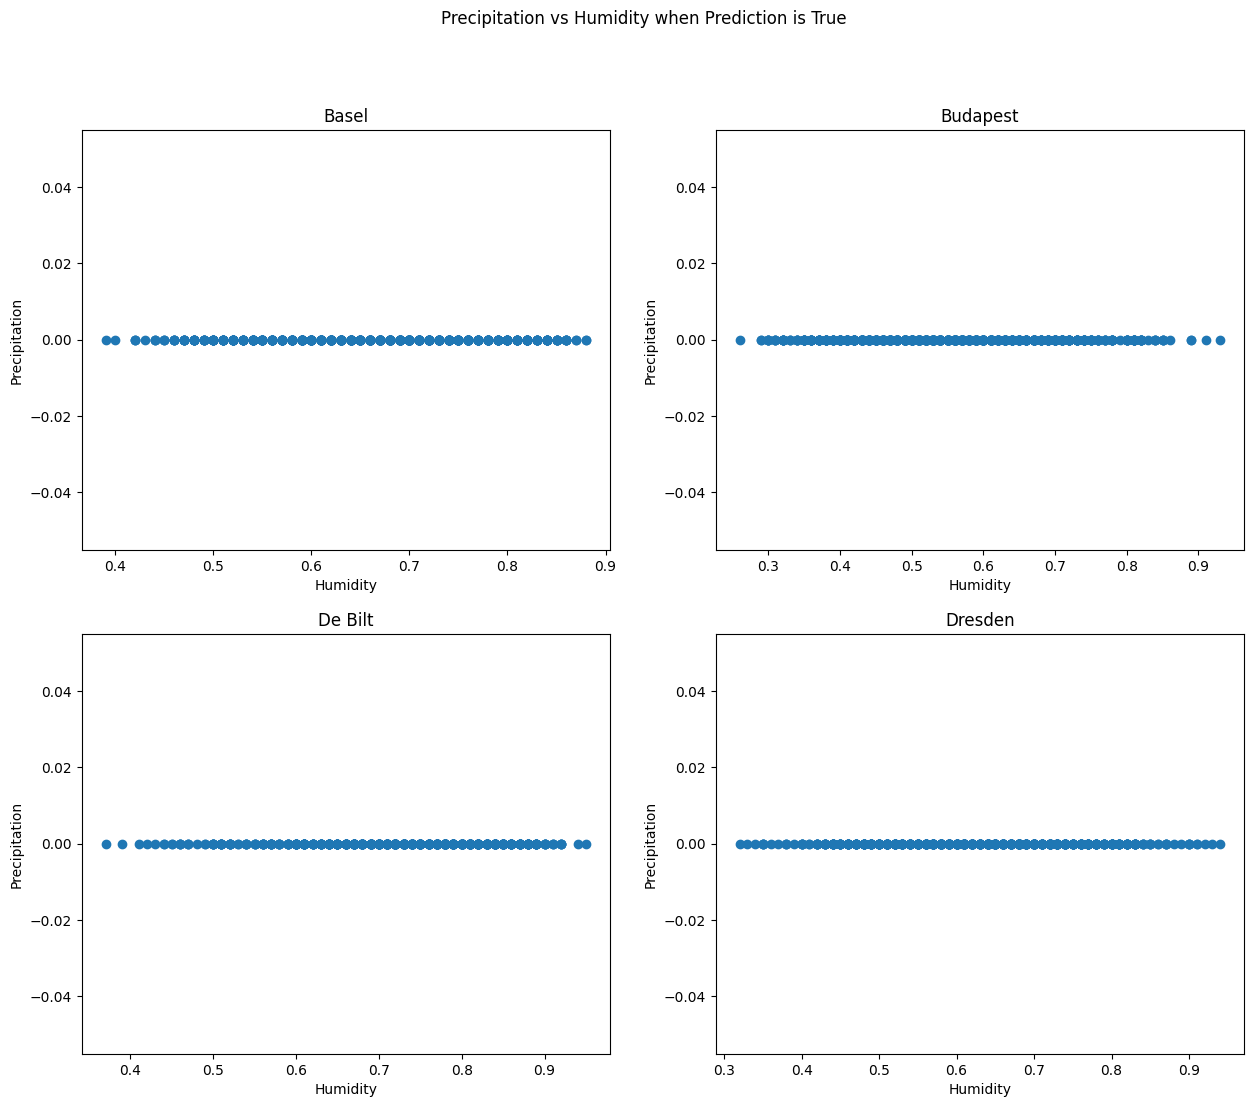

In [6]:
#making scatterplots for true
first4_country_names = ["Basel", "Budapest", "De Bilt", "Dresden"]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Precipitation vs Humidity when Prediction is True")
for i in range(2):
    for j in range(2):
        ind = 2*i+j
        axs[i, j].scatter(X_first4_humid_true_list[ind], X_first4_precip_true_list[ind])
        axs[i, j].set_xlabel("Humidity")
        axs[i, j].set_ylabel("Precipitation")
        axs[i, j].set_title(f"{first4_country_names[ind]}")

In [7]:
#making scatterplots for false
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Precipitation vs Humidity when Prediction is False")
for i in range(2):
    for j in range(2):
        ind = 2*i+j
        axs[i, j].scatter(X_first4_humid_false_list[ind], X_first4_precip_false_list[ind])
        axs[i, j].set_xlabel("Humidity")
        axs[i, j].set_ylabel("Precipitation")
        axs[i, j].set_title(f"{first4_country_names[ind]}")